# Week 3

In this week's bootcamp, we are going to analyse the data from the Students Performance in Exam Dataset available on Kaggle [here](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download).

## Data Collection

We will first import some important python libraries, which will be used for the EDA process

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We have downloaded the dataset in csv format, and we will be reading it using pandas dataframe. 

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

Now, let us see first few rows of the dataset to get a crude idea about how our dataset looks like.

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Let us find how much data we have in our hand.

In [4]:
df.shape

(1000, 8)

There are 1000 rows of data! We check what are the unique categorical values stored in different coulmns

In [5]:
for i in ['gender','race/ethnicity','parental level of education','lunch','test preparation course']:
    print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


We can see that, in the column 'parental level of education', entries of 'high school' and 'some high school' mean the same, however, they have been placed separately. We will be cleaning that at the data cleaning stage.

 Now, we check whether the column values are of correct datatype and if there are any missing values or not. We use the info function of pandas dataset to get a better view of these details.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We see that the datatypes are already in the required format, and that, there is no need of any datatype conversions. Also, there are no missing values in any column, hence, we need not worry about filling missing values.

### New Insights gained:
1. The data provided is already in the required format
2. There are no missing data

## Data Understanding

To check the descriptive statical analysis of the numerical data in our dataset, we use the describe function of pandas dataframe

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### New Insights Gained
1. The average marks obtained by students in reading and writing, is more than the average marks obtained in maths.
2. The lowest marks obtained in marths is very less than the lowest marks obtained in reading and writing.
3. Eventhough the average marks obtained in maths is lesser than the average marks obtained in other subjects, the quartile ranges are about the same. This might point towards more outliers in maths score!

Let us visualise the distribution graphs for all the scores. For this purpose, we will be using the KDE plot of seaborn.

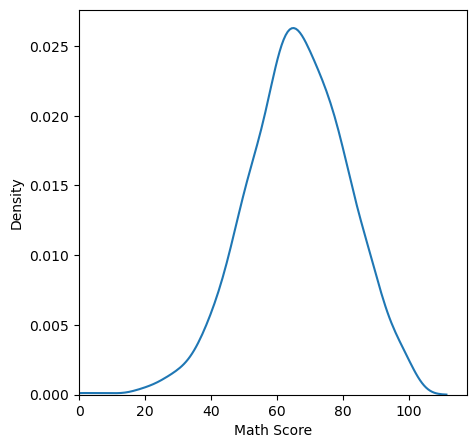

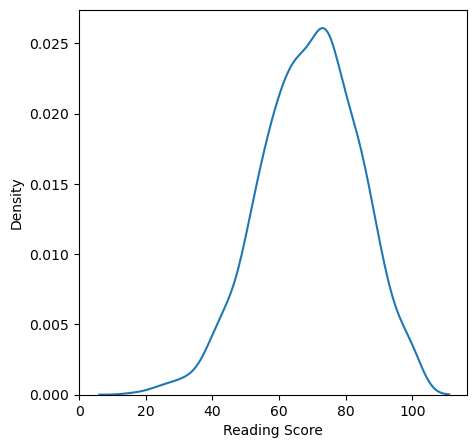

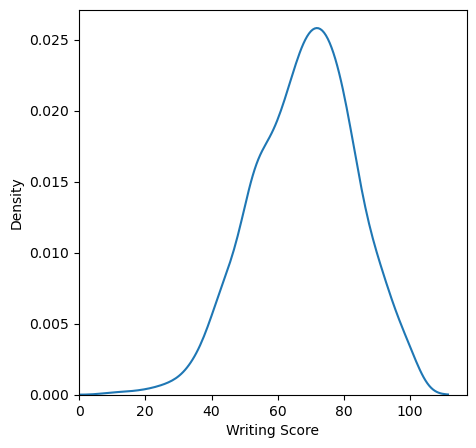

In [8]:
for i in ['math','reading','writing']:
    plt.figure(figsize=(5,5))
    sns.kdeplot(x=i+' score',data = df)
    plt.xlim(0,)
    plt.xlabel(i.title()+' Score')
plt.show()

and let us check their skewness

In [17]:
print(df['math score'].skew())
print(df['reading score'].skew())
print(df['writing score'].skew())

-0.27893514909431694
-0.25910451810923063
-0.28944397150761897


The negative value of skewness implies that the graph is skewed towrds more value of scores.

Now, let us check the existence of outliers in our data. Boxplots are a good way to find the outliers in a data. We will be using the boxplot method in seaborn for this purpose.

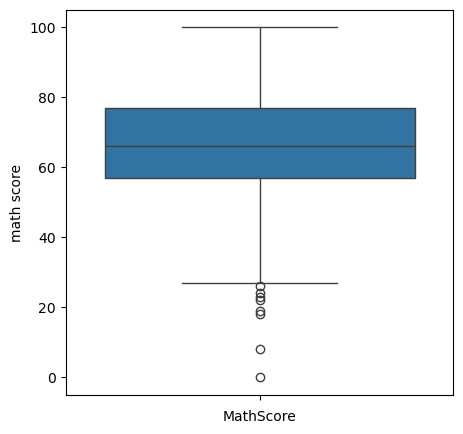

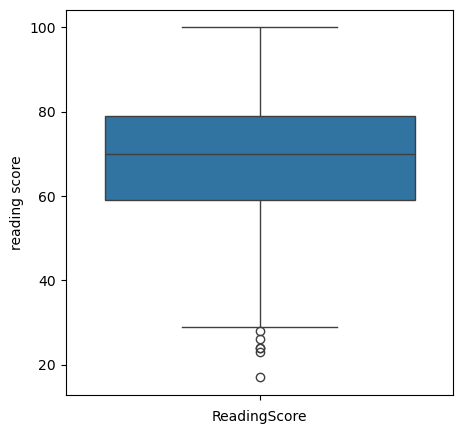

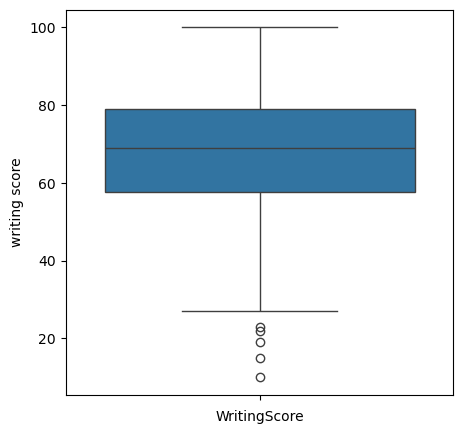

In [10]:
for i in ['math','reading','writing']:
    plt.figure(figsize=(5,5))
    sns.boxplot(y=i+' score',data = df)
    plt.xlabel(i.title()+'Score')
    plt.show()

### New Insights Gained
1. The plots obtained above suggest that our data are in the form of Normal distribution.
2. Our data does have some outliers.

## Data Cleaning

The dataset available is quite clean, as compared to raw data available from different sources, i.e., there are no missing values, and there are no redundant columns.<br>However, we had found out that a few rows have 'parental level of education' as 'high school', while some others have 'some high school', which have the same meaning, so we are going to merge these values.<br>But changing these values directly in the main dataframe can be dangerous, as it may result in loss of data. Hence, we would create a copy of the dataframe, and then, after making all the necessary changes, and checking for losses, we can merge the main dataframe with its copy.

In [11]:
df_cpy = df.copy()
df_cpy.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


df_cpy is a deep copy of our main dataframe df, so that, any changes in df_cpy won't affect anything in df.

In [12]:
df_cpy['parental level of education'] = df_cpy['parental level of education'].replace("some high school","high school")
print(df_cpy['parental level of education'].unique())
print(df_cpy.info())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


We have successfully combined the 'some high school' and 'high school' data, without losing any data!
<p>As we had observed the box plot earlier, there were some outliers in our data. However, these outliers are important because they can give some different valuable insights, which we might not get from our normal data. Hence, we don't remove these outliers, and treat them as special data. While training our models, we will use the models which would not be affected by these outliers, like, KNN, Decision trees, Random Forests, Isolation Forests and many other Ensemble methods.
<p>Now, as we have cleaned our data, we will make df_cpy as our new dataset.

In [13]:
df = df_cpy
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data Exploration

### Univariate Analysis

We will now look at the mean values of scores grouped by the categorical values of different columns, so that we could understand which columns does not affect the scores. The best way to do so is to look at the bar chart. We can get many new insights into the data from these charts.

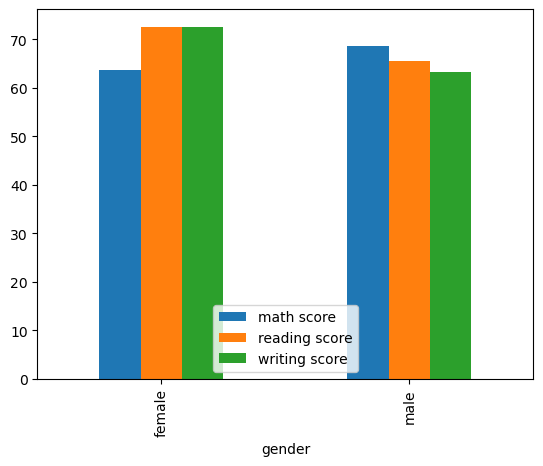

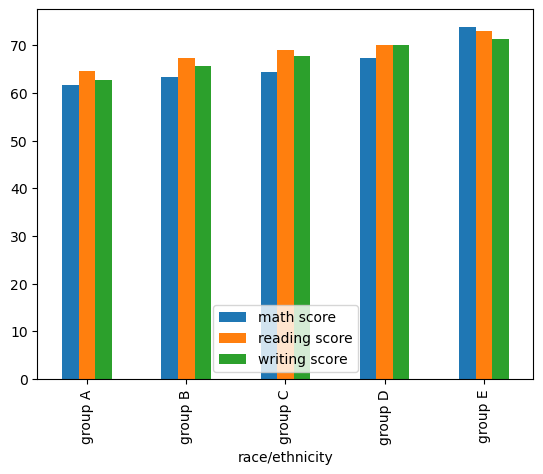

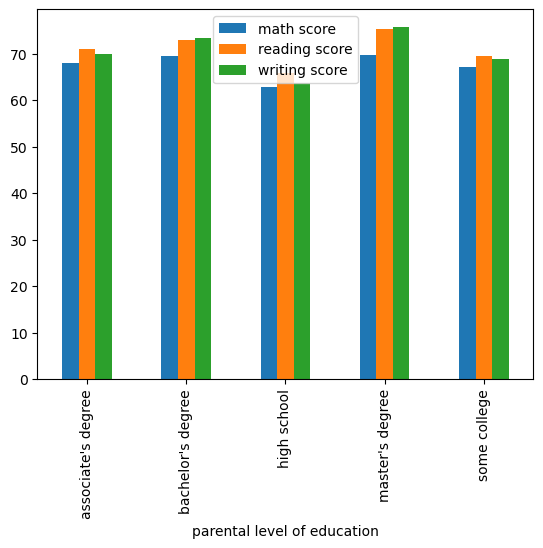

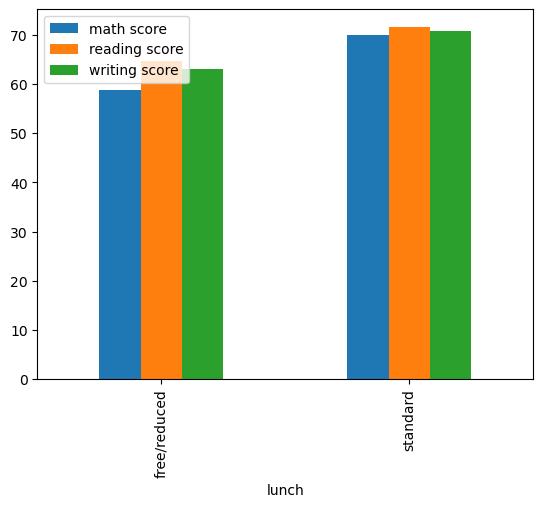

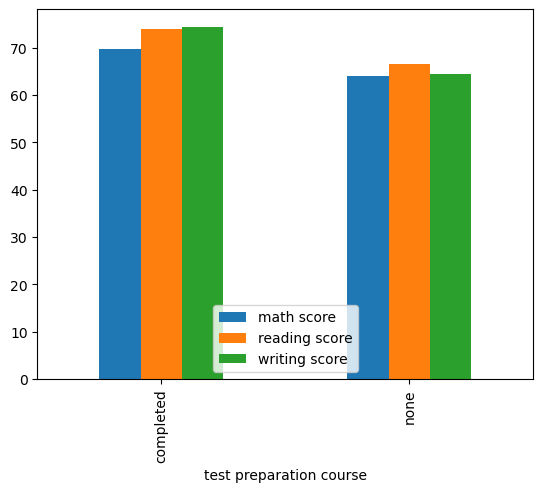

In [14]:
for i in df.drop(columns=['math score','reading score','writing score']).columns:
    df[[i,'math score','reading score','writing score']].groupby(i).mean().plot(kind='bar')

### New Insights Gained
1. From the gender vs score bar chart, we can see that the male population performed better in maths than the female population.
2. The female population performed better in reading and writing than the male population.
3. Maths score was observed to be the highest in male population as compared to other scores, while reading and writing scores were the strenghts of female population, as opposed to the male population.
4. From the race/ethnicity vs score bar chart, we can observe that the average scores of all the subjects was in the following order (descending):

    4.1. Group E

    4.2. Group D

    4.3. Group c

    4.4. Group B

    4.5. Group A
5. In groups A,B,C and D, the reading score was more than or equal to the writing score, while maths has been the lowest score.
6. However, in group E, we can see that the maths score is more than other scores, while the order between reading and writing scores has been the same.
7. From the parental level of education vs score bar chart, we can observe that the score of the child does depend on the level of education of their parents. The average score of students whose parents have master's degree was the highest, and the average score of students whose parents have eduction level till high school was the lowest, with the order as:

    7.1. Master's Degree

    7.2. Bachelor's Degree

    7.3. Associate's Degree

    7.4. Some College

    7.5. High School
8. However, maths score has been the lowest among all these groups.
9. When we carefully observe the graph between lunch vs score, we can see that students who get standard lunch score better than the student who get free/reduced lunch. However, the order of scores, i.e., Maths < Writing < Reading, is the same among both groups.
10. And, from the last graph, which is plotted between test preparation course vs score, we find that those students, who were able to complete the test preparation course, were able to get better score than those who did not complete it.
11. The writing score of those who completed the test preparation course, was highest among their other scores, while with those who did not complete the course, had scored better in reading as compared to others.

### Bivariate Analysis

Now, let us convert all the categorical variables into dummy variables.

In [15]:
dummy_df = pd.get_dummies(df,dtype=int)
dummy_df.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1


Now we will plot the correlation graph between each column and the score and identify which factors contribute more towards score of a student. The threshold value of Pearson Correlation Coefficient for weak to very weak correlation is 0.2, and any factor with correlation coefficient more than 0.2 will be considered as weakly positively correlated, and those factors with correlation coefficient less than 0.2 will be considered as weakly negatively correlated. Any factors with correlation coefficient between these threshold values will be considered to have almost no impact on the target data, here, scores.

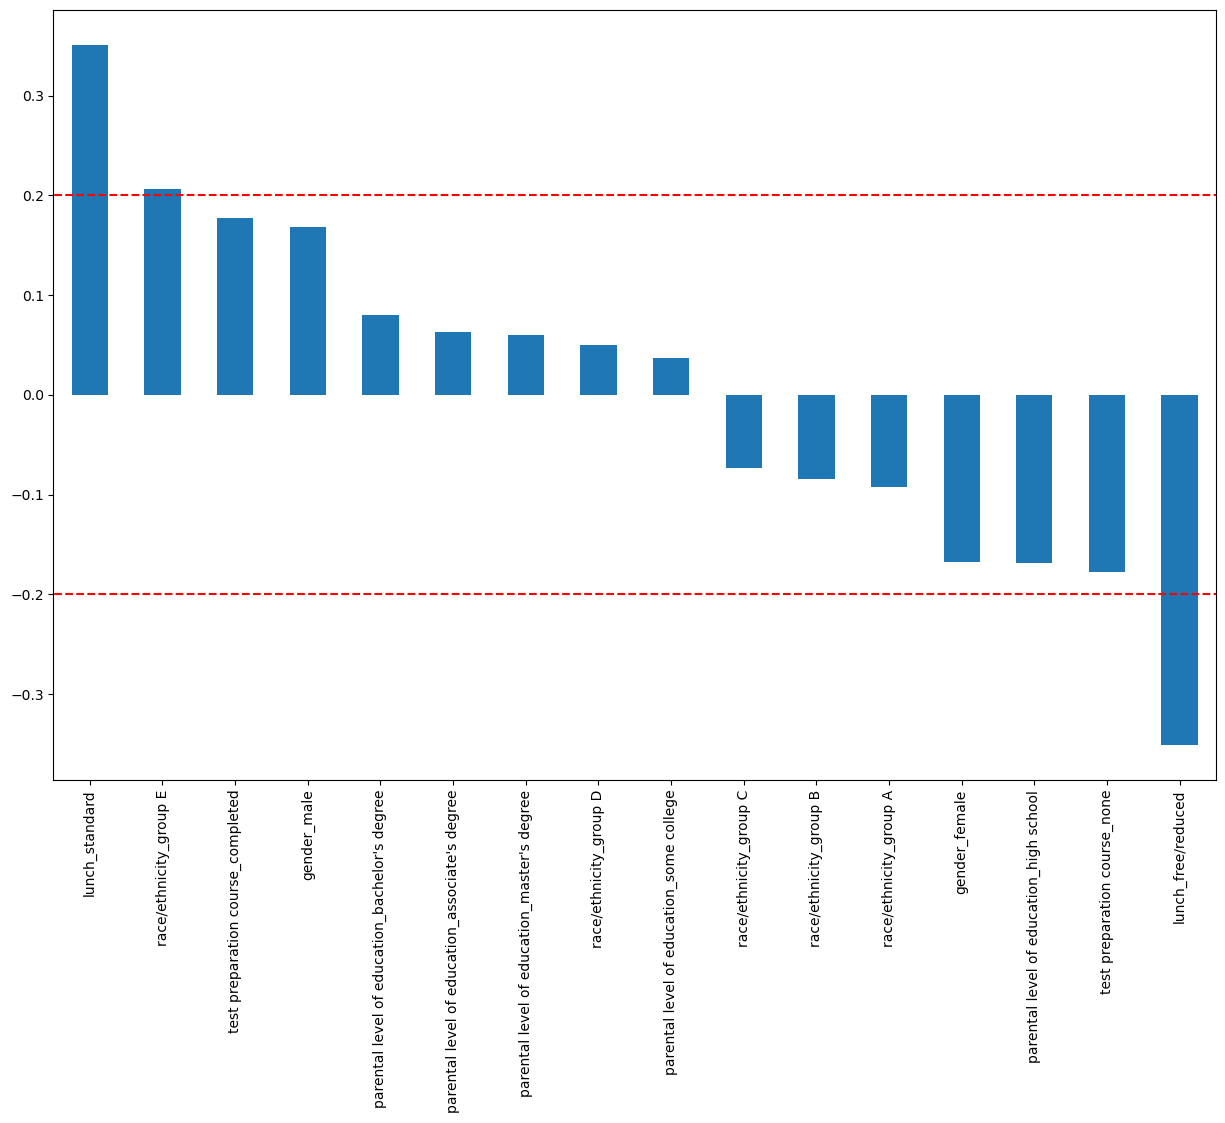

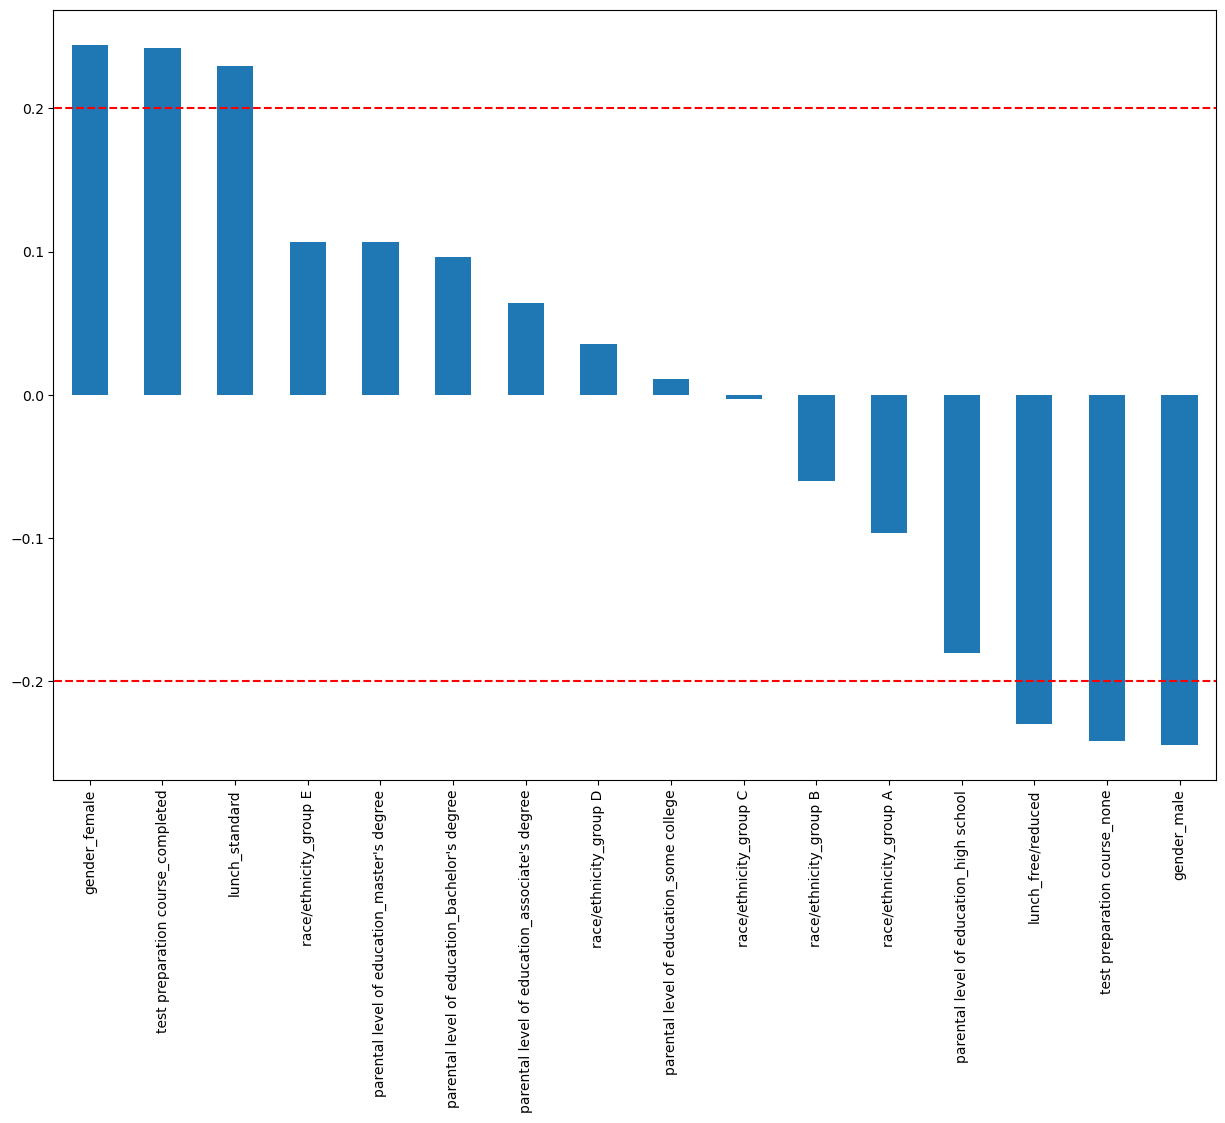

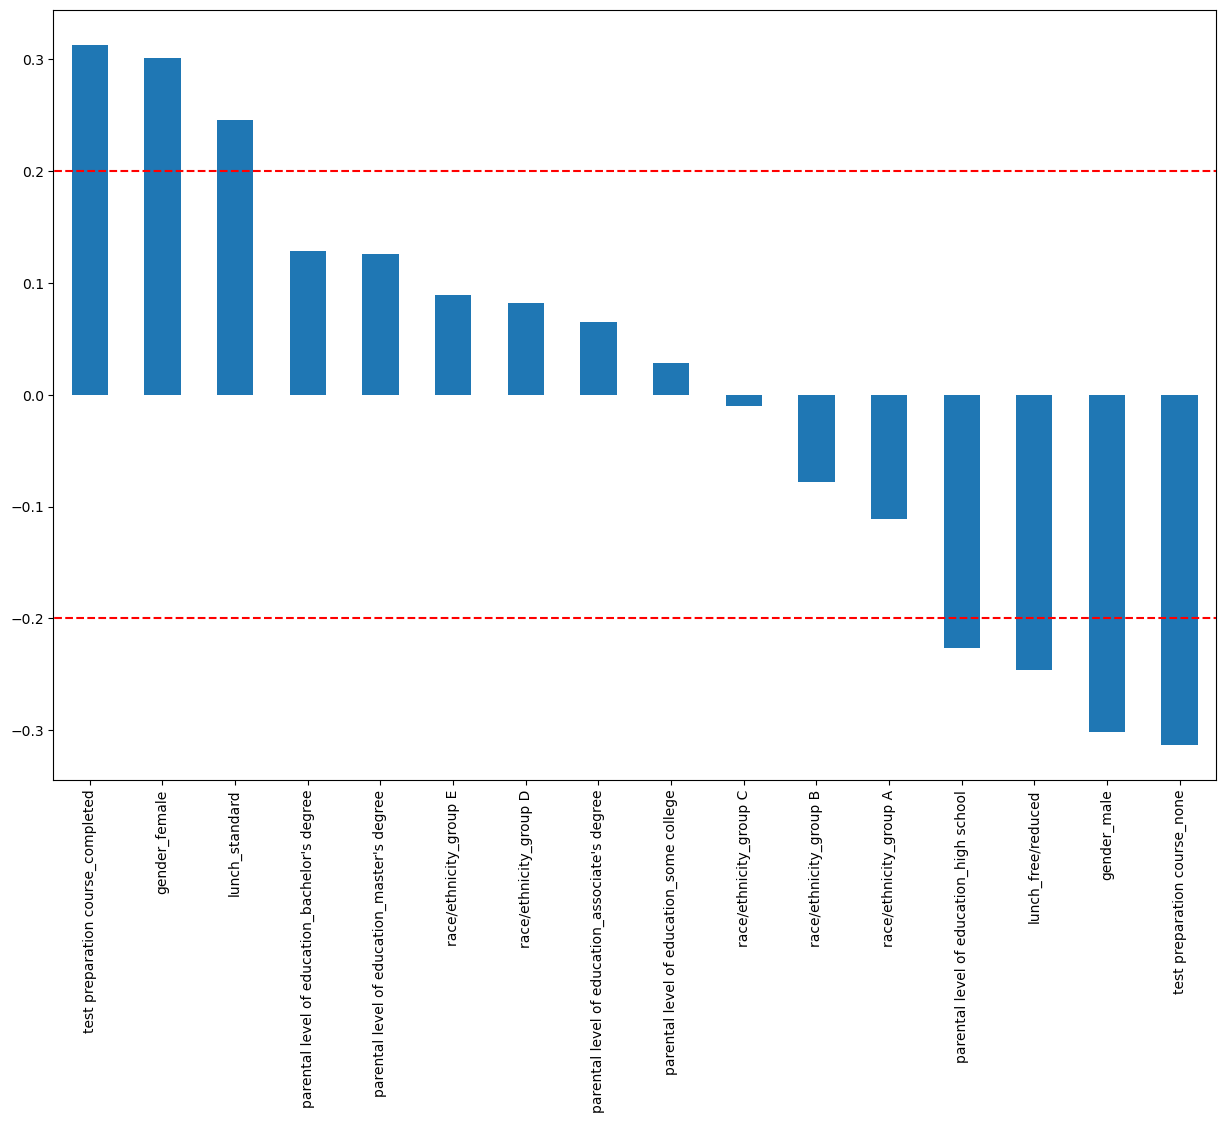

In [16]:
corr_math = dummy_df.drop(columns=['reading score','writing score']).corr()['math score']
corr_read = dummy_df.drop(columns=['math score','writing score']).corr()['reading score']
corr_write = dummy_df.drop(columns=['reading score','math score']).corr()['writing score']
plt.figure(figsize=(15,10))
corr_math.iloc[1:].sort_values(ascending=False).plot(kind='bar')
plt.plot([-5,20],[0.2,0.2],linestyle='--',color='r')
plt.plot([-5,20],[-0.2,-0.2],linestyle='--',color='r')
plt.figure(figsize=(15,10))
corr_read.iloc[1:].drop(columns=['math score','writing score'],axis=0).sort_values(ascending=False).plot(kind='bar')
plt.plot([-5,20],[0.2,0.2],linestyle='--',color='r')
plt.plot([-5,20],[-0.2,-0.2],linestyle='--',color='r')
plt.figure(figsize=(15,10))
corr_write.iloc[1:].drop(columns=['reading score','math score'],axis=0).sort_values(ascending=False).plot(kind='bar')
plt.plot([-5,20],[0.2,0.2],linestyle='--',color='r')
plt.plot([-5,20],[-0.2,-0.2],linestyle='--',color='r')
plt.show()

From the bar graph plotted above, we can get a few more insights about which factors are responsible for more score and which are responsible for less score. We can also find which factors have almost no impact on the score.

### New Insights Gained
1. Getting standard lunch, and belonging to Group E in race have weak, but noticeable, positive impact on student's maths score.
2. Getting free/reduced lunch have weak, but noticeable, negative impact on student's maths score.
3. Being a female student, completing the test preparation course, and getting standard lunch have weak, but noticeable, positive impact on student's reading score.
4. Being a male student, not completing the test preparation course, and getting free/reduced lunch have weak, but noticeable, negative impact on student's reading score.
5. Completing the test preparation course, being a female student, and getting standard lunch have weak, but noticeable, positive impact on student's writing score.
6. Not completing the test preparation course, being a male student, getting free/reduced lunch have weak, and surprisingly, having parents with education level until high school, have weak, but noticeable, negative impact on student's writing score.

## Observations

1. Data available on the Kaggle website had no missing values, and had correct column format, which made Data understanding process easier.
2. The data obtained was in form of Normal distribution, and had a few outliers, which were not removed, to give more valueable insights.
3. Male population had better maths score, than female population, who had better reading and writing scores. (even among same category)
4. Students of group E race/ethnicity performed better in all subjects than others, and students of group A race/ethnicity, had lowest marks amongst others.
5. Students, whose parents had a Master's degree, were able to score well, opposed to the students whose parents had education until high school.
6. Getting standard lunch also impacted the score, and students who get to eat standard lunch scored more than students who get free/reduced lunch.
7. Those who completed the test preparation series had a higher average score, and had scored more in writing, meanwhile, students who did not complete the test preparation course had a lower average score, and they got highest in maths.
8. The factors that had weak, but noticeably positive impact on maths score are having standard lunch and being in group E.
9. The factors that had weak, but noticeably negaive impact on maths score are having free/reduced lunch.
10. The factors that had weak, but noticeably positive impact on reading score are being a female student, completing test preparation course and getting standard lunch.
11. The factors that had weak, but noticeably negaive impact on reading score are being a male student, not completing test preparation course and getting free/reduced lunch.
12. The factors that had weak, but noticeably positive impact on writing score are completing the test preparation course, being a female student, and getting standard lunch
13. The factors that had weak, but noticeably negaive impact on writing score are not completing the test preparation course, being a male student, getting free/reduced lunch have weak, and astonishingly, having parents with education level until high school.

## Conclusion
With all these knowledge, and cleaned data, we can move on to model building, testing and deployment.